* 레이블링

In [49]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
src = cv2.imread('./data/circles.jpg')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

ret, bgray = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV) # binary gray
ret, lables = cv2.connectedComponents(bgray)

#ret # 레이블의 군집 수 (배경도 포함해서 제대로 된 데이터를 넣었다면 최소가 1이다.)

#np.unique(lables) # 레이블의 값 정보를 보니 0 1 2 3으로만 이루어져 있음

dst = np.zeros(src.shape, dtype=src.dtype)

for i in range(0, ret):
    r = np.random.randint(256)
    g = np.random.randint(256)
    b = np.random.randint(256)
    dst[lables == i] = [b, g, r] # 같은 레이블에 대해 같은 색상으로 변한다.

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
src = cv2.imread('./data/circles.jpg')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

ret, bgray = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV) # binary gray
ret, lables, stats, centroids = cv2.connectedComponentsWithStats(bgray, ) #centroids는 무게중심으로 중심점이다.

#stats # x, y, width, height, count

#centroids # 무게중심의 좌표

dst = np.zeros(src.shape, dtype=src.dtype)

for i in range(1, ret):
    r = np.random.randint(256)
    g = np.random.randint(256)
    b = np.random.randint(256)
    dst[lables == i] = [b, g, r] # 같은 레이블에 대해 같은 색상으로 변한다.
    
for i in range(1, ret):
    x, y, width, height, area  = stats[i]   
    cv2.rectangle(dst , (x, y), (x + width, y + width), (0, 0, 255), 2)
    
    cx, cy = centroids[i]
    cv2.circle(dst, (int(cx), int(cy)), 3, (255, 0, 0), -1)
    
cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()

In [108]:
src = cv2.imread('./data/keyboard.bmp')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

ret, gray = cv2.threshold(gray, 130, 255, cv2.THRESH_BINARY) # binary gray
#ret, gray = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
ret, lables, stats, centroids = cv2.connectedComponentsWithStats(gray) #centroids는 무게중심으로 중심점이다.

#dst = np.zeros(src.shape, dtype=gray.dtype)
dst = src.copy()
for i in range(1, ret):
#    r = np.random.randint(256)
#    g = np.random.randint(256)
#    b = np.random.randint(256)
#    dst[lables == i] = gray[lables == i]
    
    x, y, width, height, area = stats[i]
    cv2.rectangle(dst, (x, y), (x + width, y + height), (0, 0, 255), 1)
    
    cx, cy = centroids[i]
    cv2.circle(dst, (int(cx), int(cy)), 3, (255, 0, 0), -1)

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()

* 외곽선 검출

In [141]:
src = np.zeros(shape=(512,512,3), dtype=np.uint8)
cv2.rectangle(src, (50, 100), (450, 400), (255, 255, 255), -1)
cv2.rectangle(src, (100, 150), (400, 350), (0, 0, 0), -1)
cv2.rectangle(src, (200, 200), (300, 300), (255, 255, 255), -1)

mode = cv2.RETR_LIST
method = cv2.CHAIN_APPROX_SIMPLE

gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

ret, gray = cv2.threshold(gray, 180, 255, cv2.THRESH_BINARY)

contours, hierarchy = cv2.findContours(gray, mode, method) #계층별 외곽선 찾기

# contours[].shape # 4, 1, 2,  8, 1, 2,  4, 1, 2

for contour in contours:
    cv2.drawContours(src, [contour], 0, (255, 0, 0), 3)

In [121]:
hierarchy

array([[[ 1, -1, -1, -1],
        [ 2,  0, -1, -1],
        [-1,  1, -1, -1]]], dtype=int32)

In [142]:
cv2.imshow('src', src)
cv2.waitKey()
cv2.destroyAllWindows()

* 탬플릿 매칭

In [159]:
src = cv2.imread('./data/alphabet.bmp', cv2.IMREAD_GRAYSCALE)

dst = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

#templete = cv2.imread('./data/A.bmp', cv2.IMREAD_GRAYSCALE)
#templete = cv2.imread('./data/S.bmp', cv2.IMREAD_GRAYSCALE)
templete = cv2.imread('./data/A.bmp', cv2.IMREAD_GRAYSCALE)
#r = cv2.matchTemplate(src, templete, cv2.TM_CCOEFF_NORMED) # min이 아닌 max
r = cv2.matchTemplate(src, templete, cv2.TM_SQDIFF_NORMED) #max가 아닌 min

minval, maxval, minLoc, maxLoc = cv2.minMaxLoc(r)

w, h = templete.shape
cv2.rectangle(dst, minLoc, (minLoc[0] + h, minLoc[1] + w), (0, 0, 255), 2)
#cv2.rectangle(dst, maxLoc, (maxLoc[0] + h, maxLoc[1] + w), (0, 0, 255), 2)

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()

In [81]:
src = cv2.imread('./data/circuit.bmp', cv2.IMREAD_GRAYSCALE)

dst = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

templete = cv2.imread('./data/crystal.bmp', cv2.IMREAD_GRAYSCALE)

#r = cv2.matchTemplate(src, templete, cv2.TM_CCOEFF_NORMED)
r = cv2.matchTemplate(src, templete, cv2.TM_SQDIFF_NORMED)

minval, maxval, minLoc, maxLoc = cv2.minMaxLoc(r)

w, h = templete.shape
#cv2.rectangle(dst, maxLoc, (maxLoc[0] + h, maxLoc[1] + w), (0, 0, 255), 2)
cv2.rectangle(dst, minLoc, (minLoc[0] + h, minLoc[1] + w), (0, 0, 255), 2)

cv2.imshow('src', src)
cv2.imshow('templete', templete)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()

* 캐스케이드 분류기와 얼굴검출

In [82]:
image = cv2.imread('./data/lena.jpg')

face_cascade = cv2.CascadeClassifier('./opencv_face/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv_face/haarcascade_eye.xml')
faces = face_cascade.detectMultiScale(image, 3) #default  : scale(검색 윈도우 확대 비율) = 1.1,  minNeighbors, 최소 검출 횟수  3
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
for (x, y, w ,h) in faces:
    cv2.rectangle(image, (x, y), (x+w, x+h), (0, 0, 255), 2)
    grayROIs = gray[y:y+h, x:x+w]
    faceROIs = image[y:y+h, x:x+w] #눈이 얼굴에 있는게 당연하니까 얼굴부분만 따오고 거기서 검출하면 검출하는 횟수가 줄어든다.
    eyes = eye_cascade.detectMultiScale(grayROIs, 1.1, 1)
    
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(faceROIs, (ex, ey), (ex+ew, ey+eh), (255, 0, 0), 2)
    
cv2.imshow('image', image)
cv2.waitKey()
cv2.destroyAllWindows()

* HOG 알고리즘과 보행자 검출

In [36]:
src = cv2.imread('./data/people1.png')

In [37]:
hog = cv2.HOGDescriptor() #호그 알고리즘을 통한 보행자 검출 함수

In [38]:
dst = hog.compute(src) #계산하기

In [41]:
dst.shape #셀당 9개의 구간으로 분활되었다.

(3780, 1)

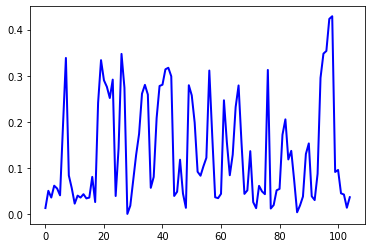

In [50]:
plt.plot(dst[::36], color='b', linewidth='2') # 36구간에 대해서

In [42]:
cv2.imshow('src', src)
cv2.waitKey()
cv2.destroyAllWindows()

In [60]:
src = cv2.imread('./data/people.png')
hog = cv2.HOGDescriptor() #호그 알고리즘을 통한 보행자 검출 함수
people_detect = cv2.HOGDescriptor_getDefaultPeopleDetector()
hog.setSVMDetector(people_detect)

loc1, weight1 = hog.detect(src)

dst1 = src.copy()
loc2, weight2 = hog.detectMultiScale(src)
for rect in loc2:
    x, y, w, h = rect
    cv2.rectangle(dst1, (x, y), (x+w, y+h), (0, 255, 0), 2)

dst2 = src.copy()
loc3, weight3 = hog.detectMultiScale(src, winStride=(1, 1), padding=(8, 8)) #매개변수 조정으로 인해 끝부분도 잡아주고 더 많이 잡는데 문제는 사람이 아닌것도 잡았음
for rect in loc3:
    x, y, w, h = rect
    cv2.rectangle(dst2, (x, y), (x+w, y+h), (0, 0, 255), 2)
    
cv2.imshow('src', src)
cv2.imshow('dst1', dst1)
cv2.imshow('dst2', dst2)
cv2.waitKey()
cv2.destroyAllWindows()

In [69]:
from skimage.feature import hog
import matplotlib.image as mpimg

In [77]:
src = cv2.imread('./data/people1.png')
gray = cv2.cvtColor(src, cv2.COLOR_RGB2GRAY)

hog_feature, hog_image = hog(gray, orientations=9, pixels_per_cell=(8, 8), # 구간 사이즈, 셀의 사이즈
                            cells_per_block=(2, 2), # 블럭의 사이즈 셀이 2 x 2만큼 드감
                            block_norm='L2-Hys', transform_sqrt=False, # 음수 문제 안생기게 sqrt = false
                            visualize=True, feature_vector=False) # 피쳐 벡터는 형상이다. 3750이 아닌 내부 구조도 나온다.
#hog에 대한 일반정인 사용법
hog_feature.shape

cv2.imshow('src', src)
cv2.imshow('hog_image', hog_image)
cv2.waitKey()
cv2.destroyAllWindows()

In [74]:
hog_image.shape

(128, 64)

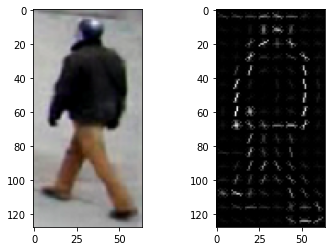

In [78]:
fig = plt.figure()
plt.subplot(121)
plt.imshow(src)
plt.subplot(122)
plt.imshow(hog_image, cmap='gray') # 에지같이 외각에 대해 형태를 나타낸다.

# 프로젝트

1. blur
2. canny detector
3. ROI 
4. hough transform
5. draw

---------

## 버린 프로젝트 - 컴퓨터 비전에 관심 있으면 해보기
1. 왜곡(카메라 렌즈굴절) #선이 선이 아닌 곡선이 되는것 -> 카메라 캘리브레이션
2. 투시변환(원근감)
3. color convert (ycrcv, hsv) #바 만드는 것 괜찮은듯
4. sobel mask (x축 크기) # 마치 도로
5. 추출된 엣지로 histogram peak
6. draw (그리기) 

어파인 변환 - 카메라 캘리브레이션에는 특히, 그리고 투시변환과 유사
행렬(M)로 선형 변환

# 행할 프로젝트
kitty 

차량 이미지 100 (car / Not car) 10000 : 8000

Vehicles / jpeg, png

Not vehicles / jpeg, png 


데이터를 적재

레이블링(정답을 매김)
이미지 시각화가 중요


특성 추출(Color based(histogram) = color only, Shaped based(hog) = shape only

, template match(유사도, 광원값과 모양도 같아야함) = both color and sahpe

, Color & Shape 가 둘 다 필요한것은 raw pixel 원본이 들어가야 한다. Color은 컬러가 필요하고 shape는 gray가 필요하다)


-----------------------------

훈련/검증/테스트 분리

모델 훈련 (그리드 탐색)
예측 - SVM cv2.ml.SVM_ONE_CLASS
날씨데이터 연관성.

---------

### Detect 슬라이딩 윈도우 방식 =  분류 - 어려워서 안 할 예정

모델이 테스트 데이터에 대해 예측
테스트 데이터 : 정지 영상

In [ ]:
컬럼 5              0 0 0 0 1 1 or 0
                    0 0 0 1 1  data[:,:-2] 영상이고, data[:, -1] 은 
행이 4              0 0 0 0 1  r 10000: 8000 g 100 , ... b  gray 연관성 x  차량을 파랗게 칠한다. 정답데이터 빨갛게 칠하면 정답이 아닌 데이터

__.py로 만들고 import 하는 방식으로 = import __

주피터로 만들어서 전체를 이어만들기

1. 데이터 라벨링
mnist를 활용하여 처리하고 합치기.   concat 1 정답 image = image[:-2],  lable = image[-1]

넘파이

2. 데이터 축소.
* blur에 대해 선명도 처리 day 5~6
* np.zeros로 0만든 배열 만들고, 엣지를 딴 원본에서 차량 또는 차량이 아닌 것만 가져옴 이거는 그나마 쉽다 canny 써서?
                                          
canny

해당 데이터에 대한 분석 필요

3. 데이터 합치고 섞기 (non car + car)
trans_data_split()
sklearn

4. 학습 및 예측
예측 - SVM cv2.ml.SVM_ONE_CLASS 쓰면 된다. 사용법 익히기.

sklearn